In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "student_sleep.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Status         500 non-null    object 
 5   Sleep_Duration       498 non-null    float64
 6   Study_Hours          499 non-null    float64
 7   Screen_Time          498 non-null    float64
 8   Caffeine_Intake      499 non-null    float64
 9   Physical_Activity    497 non-null    float64
 10  Sleep_Quality        499 non-null    float64
 11  Weekday_Sleep_Start  497 non-null    float64
 12  Weekend_Sleep_Start  498 non-null    float64
 13  Weekday_Sleep_End    500 non-null    float64
 14  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(10), int64(2), object(3)
memo

(None,
    Student_ID  Age Gender University_Year Sleep_Status  Sleep_Duration  \
 0           1   24  Other        2nd Year          Yes             7.7   
 1           2   21   Male        1st Year          Yes             6.3   
 2           3   22   Male        4th Year          Yes             5.1   
 3           4   24  Other        4th Year          Yes             6.3   
 4           5   20   Male        4th Year           No             4.7   
 
    Study_Hours  Screen_Time  Caffeine_Intake  Physical_Activity  \
 0          7.9          3.4              2.0               37.0   
 1          6.0          1.9              5.0               74.0   
 2          6.7          3.9              5.0                NaN   
 3          8.6          2.8              4.0               55.0   
 4          2.7          2.7              0.0               85.0   
 
    Sleep_Quality  Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
 0           10.0                14.16           

In [ ]:
df_cleaned = df.drop(columns=["Student_ID", "Gender", "University_Year", "Sleep_Status"])
df_cleaned.fillna(df_cleaned.mean(), inplace=True)
df_cleaned.isnull().sum()

Age                    0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

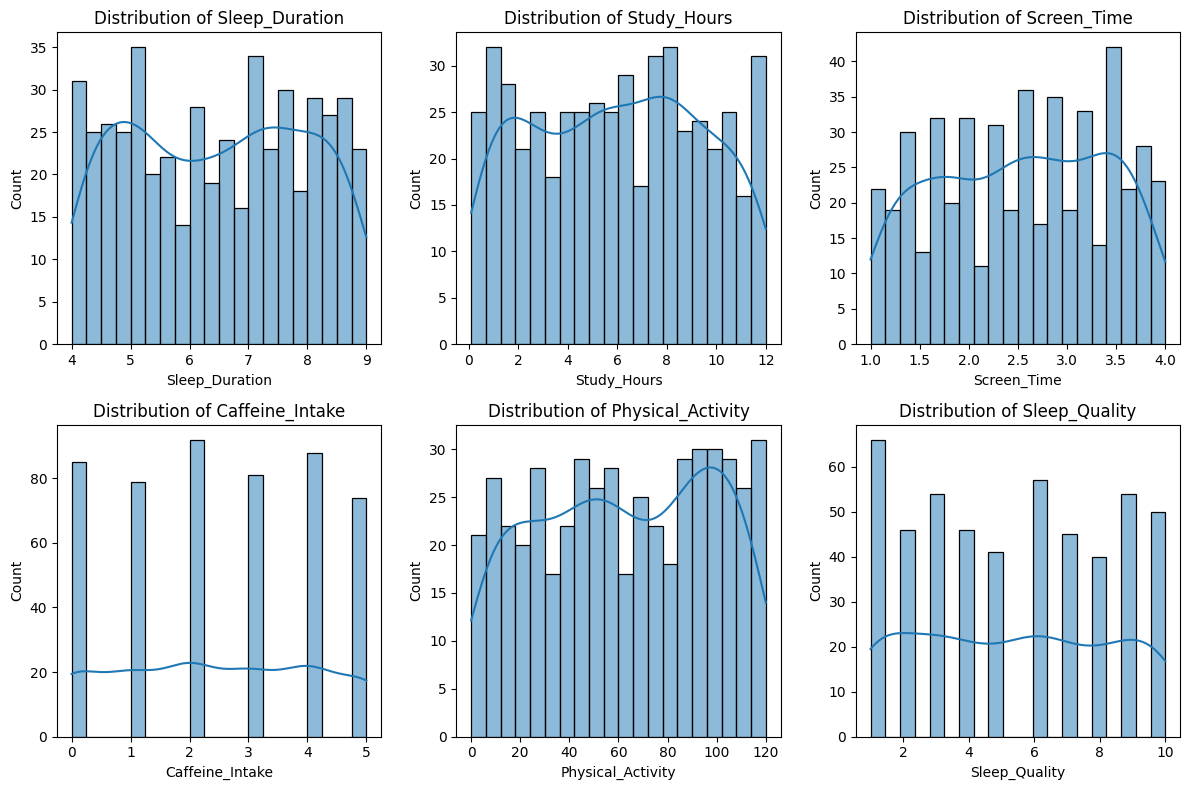

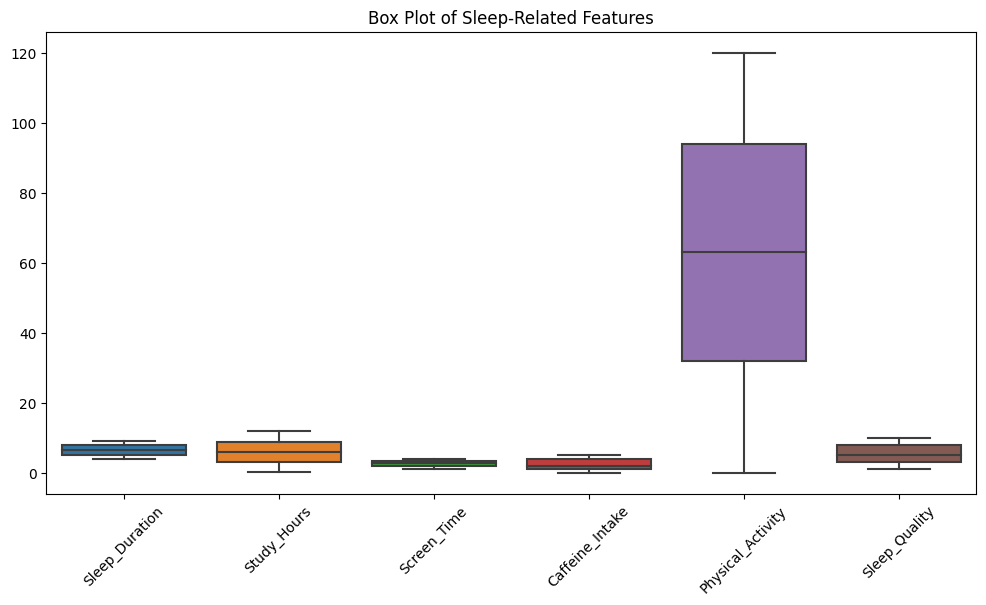

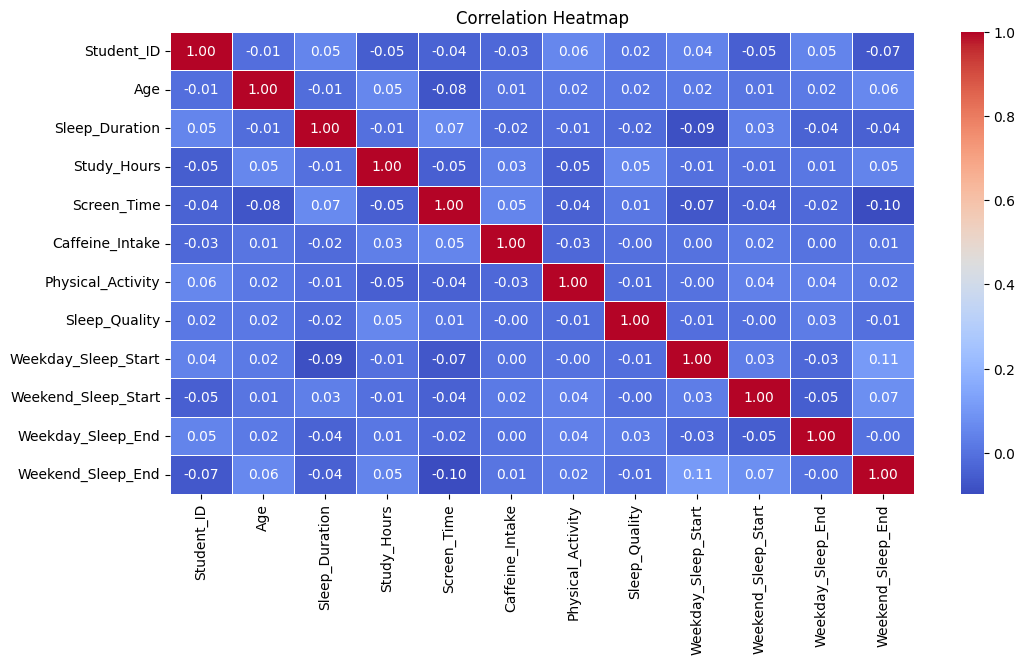

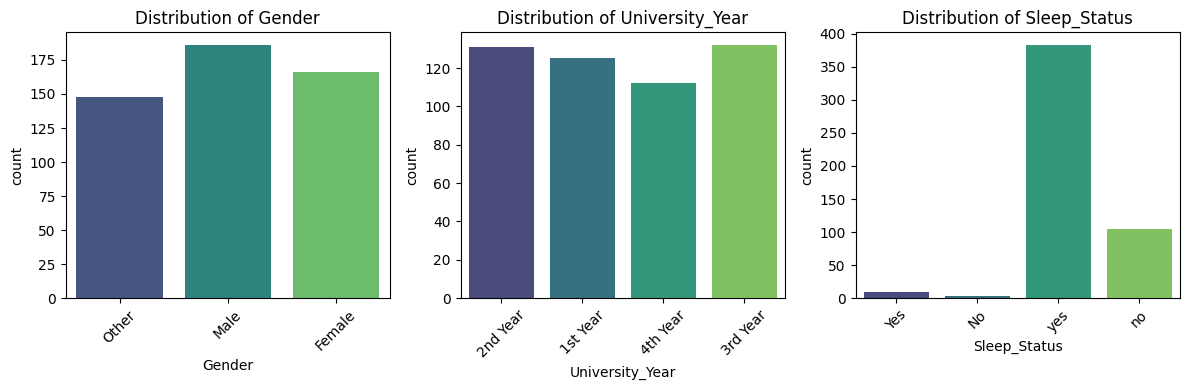

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,498.000000,499.000000,498.000000,499.000000,497.000000,499.000000,497.000000,498.000000,500.000000,500.000000
mean,250.500000,21.53600,6.469880,5.971944,2.529518,2.460922,62.374245,5.354709,11.157445,12.393775,6.929900,8.988100
std,144.481833,2.33315,1.486863,3.472493,0.858167,1.683840,35.261877,2.965740,5.977703,5.789205,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.000000,3.000000,6.080000,7.327500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.000000,2.600000,2.000000,63.000000,5.000000,10.630000,12.715000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,94.000000,8.000000,16.150000,17.342500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [ ]:
import seaborn as sns
summary_stats = df.describe()

numeric_columns = ["Sleep_Duration", "Study_Hours", "Screen_Time", "Caffeine_Intake", "Physical_Activity", "Sleep_Quality"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Box Plot of Sleep-Related Features")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

categorical_columns = ["Gender", "University_Year", "Sleep_Status"]

plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


summary_stats


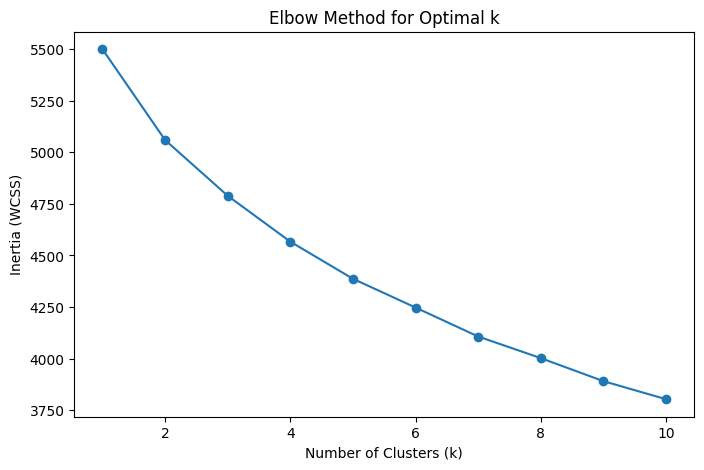

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Use the elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


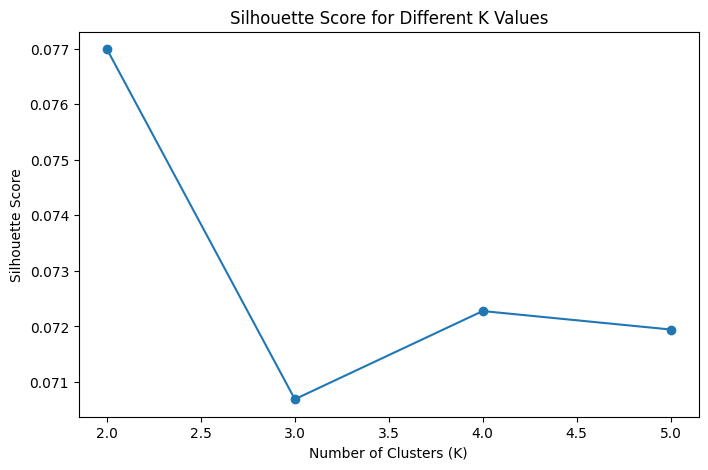

2

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different cluster sizes
silhouette_scores = []

for k in range(2, 6):  # Starting from 2 clusters as silhouette score isn't valid for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append((k, silhouette_avg))

# Find the best number of clusters based on the highest silhouette score
best_k, best_silhouette = max(silhouette_scores, key=lambda x: x[1])

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot([k for k, _ in silhouette_scores], [s for _, s in silhouette_scores], marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values")
plt.show()

best_k



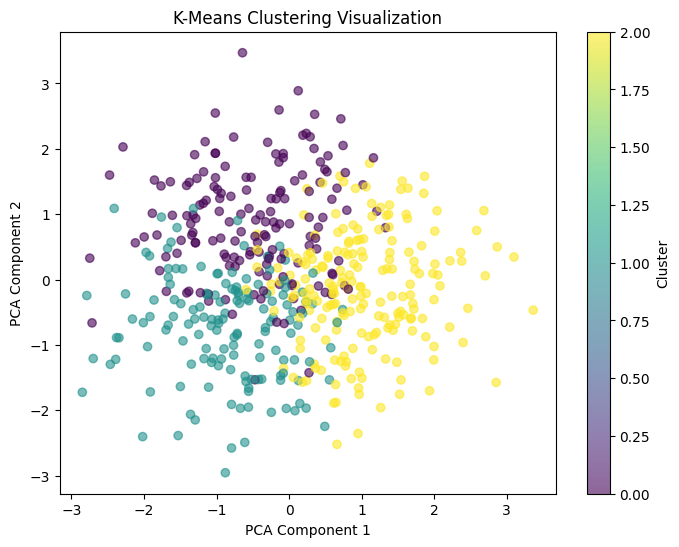

In [6]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()
